# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [48]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [28]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std(ddof=0)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

* If the `'RM'` value increases: I expect there would be an **increase** in `'MEDV'`, the value of a home. A larger value for `'RM'` indicates that the houses in a given neighborhood tend to be larger in size. In addition to the simple fact that larger houses tend to be more valuable than smaller ones, desirable neighborhoods often attract developers or residents willing to invest more money in building or buying larger houses.


* If the `'LSTAT'` value increases: I expect there would be a **decrease** in `'MEDV'`. The working poor have less money available to spend on a house. If a neighborhood has a larger fraction of its residents fall into this category, it follows that a correspondingly larger fraction of the neighborhood's homes have been purchased by folks who have relatively less money to spend on a home, which means that more of this neighborhood's homes have values low enough to be affordable to the working poor.


* If the `'PTRATIO'` value increases: I expect there would be an **decrease** in `'MEDV'`. Better, more desirable schools give their students greater attention from teachers, which means that those schools have a relatively lower student-to-teacher ratio. An increase in `'PTRATIO'` thus corresponds to a neighborhood's schools being less desirable. If schools are less desirable, one can expect the value of a home in that neighborhood to be relatively lower.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [29]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [30]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** With an R2 score of 0.923, I would consider this model to have successfully captured the variation of the target variable. 

We know that an R2 score of 1 indicates that the model's features can explain 100% of the target variable. Since this R2 score of 0.923 is very close to the highest possible R2 score of 1, I would conclude that this model can predict almost all (92.3%) of the target variable. 

In other words, this model does a much, much better job of predicting the target variable's values than the simple average of all those values would -- the mean squared error of this model's predictions is much, much lower than the mean squared error between the target variable's true values and their average, resulting in the high R2 score of 0.923 that we have here for this model.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [31]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:** Splitting a dataset into a ratio of training and testing subsets helps prevent our overfitting our model to its training data. We need a model that is generalized enough to be able to make reasonably good predictions for datapoints it hasn't been trained on. 

Setting aside a subset of datapoints that is reserved for testing helps us to know how well our model might predict target values when it is fed brand new datapoints that is hasn't been trained on. 

Also, when splitting the dataset into traning and testing subsets, we need to ensure that the training subset has enough datapoints so that we don't accidentally underfit our data.

The split should be made such that we can have the right balance between high bias (underfitting) and high variance (overfitting). This will give us the best chance of identifying a model that has minimum error in its predictions of both training and testing target values.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

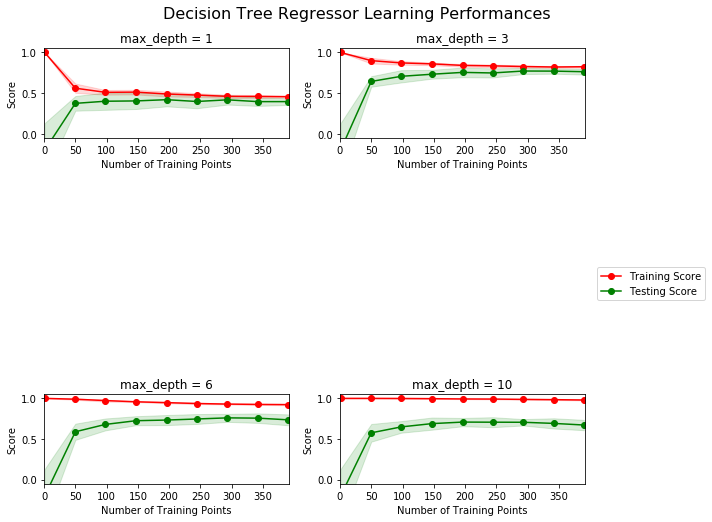

In [32]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**
* The maximum depth for the model is max_depth = 3. This graph indicates neither high bias (underfitting) nor high variance (overfitting).


* As more training points are added, the score of the training curve first decreases slightly, and continues to decrease by less and less, until it converges with the score of the testing curve. For the testing curve, as more training points are added, the testing curve's score first increases steeply, and then increases by smaller and smaller amounts until it converges with the training curve's score.


* Having more training points benefits the model up to the point where we can identify a clear pattern of convergence between the training score and testing score curves. However, once these curves' respective rates of decrease and increase have leveled off and we have observed their convergence, assuming that we are above our benchmark threshold, adding still more training points doesn't provide any further benefit to the model and may possibly keep us from choosing a promising model: 
  * Assuming that our extra training points would come from the testing subset of our dataset, it is possible that the amount of datapoints inside the testing subset could eventually become so small that we would be unable to adequately evaluate our model's performance in predicting the test targets. The testing score curve, after converging with the training score curve, could begin to drop and fall away from the training score curve, once the testing subset becomes too small. 
  * If we assume that the extra training points don't come from the testing subset, then adding more of these points doesn't necesssarily hurt our model or our evaluation of it, but could result in an unnecessary extra effort/cost of collecting more data that won't help make our model any better.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

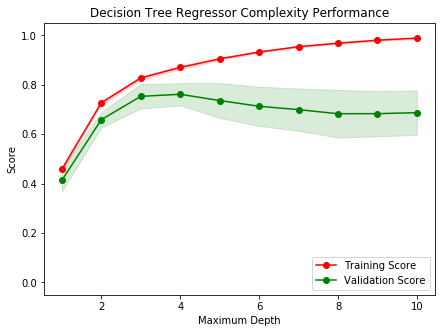

In [33]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:**
* At maximum depth of 1, the model suffers from high bias (it underfits). Both the training and validation scores are low.


* When the model is trained at a maximum depth of 10, it suffers from high variance (it overfits). The training score is very high, but the validation score is much lower. This indicates that the model does not generalize to new datapoints.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**
* A maximum depth of 3 results in a model that best generalizes to unseen data.


* At maximum depth of 3, the distance between training score and validation score curves is still relatively small, and the validation score curve has almost reached its maximum. It is here that we have our best validation score without overcomplicating our model. It is true that at a maximum depth of 4, the graph above indicates that the validation score might be ever so slightly higher than it had been at a maximum depth of 3. However, this increase is too small to justify our choosing the more complicated model with maximum depth of 4.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**
* Machine learning algorithms often have several hyperparameters, and each of these hyperparameters can itself be one of several different values. For example, the decision tree algorithm has a parameter called "min_samples_split," which can be a positive integer or float, and represents the minimum number of samples required to split an internal node. Grid search solves the problem of finding the value or combination of values for one or more hyperparameters that enables our model to get the highest performance on the training data. 


* The "grid" in gridsearch is essentially a table that contains an entry for each unique combination of values for all the hyperparameters (and corresponding ranges of values) that we are investigating. The grid search algorithm systematically goes through each of these combinations, trains a model with a particular set of hyperparameter values, and then scores this model's performance on the cross-validation data subset. After training and scoring each combination of hyperparameters, grid search gives us the hyperparameter values that resulted in the highest score on the cross-validation subset.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:**
* K-fold cross-validation allows us to use as many of our datapoints as possible as training data without violating the principle that we should never test our model on data we used to train it. The trick here is that we break our entire dataset into k different subsets of datapoints. We then run k different experiments. In each experiment we use a different subset as the testing subset, and all the other k-1 subsets are combined to form the training subset. Our final training score is the average of the training scores for each of the k experiments, and the final testing score is the average of the testing scores for each of the k experiments.


* K-fold cross-validation is especially helpful for gridsearch because it allows us to test as many combinations of hyperparameter values as we desire, without having to worry about setting aside, or "wasting," too much of our dataset as testing data (so that we don't make the mistake of training and testing a model on the same datapoints). For example, if we have k different combinations of hyperparameter values that we wish to try out, instead of having to make sure we also have k different subsets of testing data (one unique subset for each of our k hyperparameter combinations), we can just perform k-fold cross-validation, where each of the k experiments is run on one of our k hyperparameter combinations and uses a different one of the k data subsets as testing data.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [51]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [52]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer:** Parameter 'max_depth' is 4 for the optimal model. This is one level of depth greater than my guess in **Question 6**, which was to choose the model with 'max_depth' of 3.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [53]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer:**  
* Predicted selling price for Client 1's home: $403,025.00   

* Predicted selling price for Client 2's home: $237,478.72  

* Predicted selling price for Client 3's home: $931,636.36

These prices seem reasonable given the values of the features of each client's home. Each home's price corresponds to the home's features in a manner consistent with my intuition as I described it in my answer to **Question 1**: 

* Client 2's home has the smallest number of rooms, highest neighborhood poverty level, and highest student-to-teacher ratio. I would expect that each of these should correlate with a lower home price, and client 2's predicted price is the lowest of the three. 

* On the other side of the spectrum, client 3 has the largest number of rooms, lowest neighborhood poverty level, and lowest student-to-teacher ratio. Each of these should predict a higher home price and sure enough, client 3's predicted selling price is the highest. 

* Given that the values of the features for client 1's home all fall in between those of client 2 and client 3, I would expect the predicted price of client 1's home to be in the middle, which is also the case here.


Additionally, these predictions also make sense in light of the descriptive statistics I calculated above in **Data Exploration**:

* All three predicted prices fall inside the range of the dataset's minimum price of `$105,000` and its maximum price of `$1,024,8000`.

* Since client 2's home has less-desirable values for each of its three features, I am not surprised to see that its predicted price is well below the dataset's mean price of `$454,343` and median price of `$438,900`, and closer to the dataset's minimum price.

* I am also not surprised by client 3's predicted price being well above the mean and median prices, and closer to the maximum price, given that client 3 had relatively more-desirable values for its three features.

* Since the values for client 1's three features are neither terrible nor superb, I am not surprised that the predicted price for their home is closer to the dataset's mean and median prices.

* Finally, given that the standard deviation of the dataset's prices is `$165,171`, the predicted values for each of the clients are spread out in a way I'd expect, with client 2's predicted price being over 1 standard deviation below the mean, and client 3's predicted price being almost 3 standard deviations above the mean: client 2's house seems about that bad, and conversely, client 3's house seems about that nice.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [54]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**
I believe that this model could be used in a real-world setting, with a few caveats. Although inflation shouldn't be an obstacle (the **Getting Started** section tells us that prices have been multiplicatively scaled to account for 35 years of inflation), I wouldn't recommend using a model trained only on data from the urban Boston housing market to make approriate predictions for other markets. In rural markets and even in certain urban markets, a home price for a certain combination of average number of rooms, neighborhood poverty level, and student-to-teacher ratio may well be significantly lower than the same combination's price would be inside Boston. Boston has a lot less space than, say, Houston, Texas, and overall property values in Boston are much higher than they are in Houston.

While our `'RM'` feature accounts for the average number of rooms in a house in a neighborhood, my intuition is that we still need a feature that represents the most meaningful individual characteristic of a home: it's size. This could be a home's lot size, or perhaps its square footage. I find it doubtful that factors like quality of apppliances in the home, and the presence of a pool would be meaningful features for our model. I believe that these kinds of granular features would have a strong correlation with the three features we've already chosen as well as the with the individual home size feature that I would like to add. I thus don't expect that knowing a home's appliance quality, for example, would meaningfully reduce the error of our model's predictions.

Nonetheless, while neighborhood characteristics probably shouldn't be the only features we use, they are still essential in predicting a home's price. It's a simple fact of life that real estate prices strongly correlate with location.

We see above that the range of prices over ten predictions for the same home is $73,357.39. This is less than half of one standard deviation of the dataset's prices and I believe that our model's consistency is robust enough for its purpose, which is to give a real-estate agent a ball-park figure on which to base a home's listing price. Our model will at least help the agent know where to start, and any "incorrectness" in the model's prediction would be small enough that it could conceivably be remedied by the market (say, a bidding war if the list price is too low), or in negotiations with a prospective buyer (if the list price was too high). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.